## 🔎 Sentiment Analysis for FoodPanda Google Reviews

#### For this project, I intend to gather insights based on the sentiments expressed by Google reviewers. This approach can provide a valuable understanding of customer opinions and experiences, providing the company some recommendations based on that data.

#### I will also leverage the convenience of the 🤗 Pipelines library for running sentiment predictions quickly and easily. The primary objective is to evaluate the effectiveness of the chosen model in accurately classifying positive and negative comments. Additionally, I will calculate prediction scores and incorporate feature engineering techniques to address any inconsistencies or irregularities in the data

<hr>

#### Dataset
#### https://www.kaggle.com/datasets/bwandowando/foodpanda-app-reviews-from-google-store

<hr>                                        

### Objectives:
1. Review Trends Analysis: Identify the months with significantly higher review counts and investigate the reasons driving the increased feedback volume

2. Identify User Pain Points: Conduct topic modeling to uncover and categorize the primary pain points expressed by users, and provided recommendations

3. Enhance Sentiment Prediction Model: Try to develop a machine learning model to improve sentiment prediction accuracy. Incorporate strategies for effectively handling emojis (and maybe languages) to ensure robust performance across varied emotive expressions

#### Step 0: Importing libraries and read in data

In [1]:
import pandas as pd
import numpy as np

#### Since the dataset is too large for my machine, I will take the most recent 100,000 reviews

In [2]:
# Read in data
df = pd.read_csv('C:/Users/User/Desktop/FoodPanda/FOODPANDA_REVIEWS.csv')
print(df.shape)
df = df.dropna()
print(df.shape)
df = df.tail(100000)
print(df.shape)

(548326, 8)
(450936, 8)
(100000, 8)


In [3]:
df.head()

,Unnamed: 0,review_text,review_rating,author_id,author_name,author_app_version,review_datetime_utc,review_likes
423156,423156,Very good,5,109014*********693269,A Google user,21.21.0,2021-11-12T04:51:57.000Z,0
423157,423157,"i is good to buy from panda mart , i have got ...",4,115360*********290627,A Google user,21.21.0,2021-11-12T04:53:14.000Z,0
423158,423158,Nice,1,115608*********483372,A Google user,21.20.2,2021-11-12T04:56:48.000Z,0
423159,423159,"Everytime i need to ordered, i need to update ...",1,110206*********428961,A Google user,21.21.0,2021-11-12T04:59:18.000Z,0
423160,423160,Use Full App Thank You Soo Much ❤️,5,109841*********607741,A Google user,21.20.2,2021-11-12T05:13:52.000Z,0


In [4]:
df.describe()

,Unnamed: 0,review_rating,review_likes
count,100000.000000,100000.000000,100000.000000
mean,485398.253330,3.526270,3.395940
std,35843.929186,1.777116,71.066444
min,423156.000000,1.000000,0.000000
25%,454279.750000,1.000000,0.000000
50%,485756.500000,5.000000,0.000000
75%,516126.250000,5.000000,0.000000
max,548324.000000,5.000000,9374.000000


<hr>                                    

### Step 1: Data Cleaning

In [5]:
df.dtypes

Unnamed: 0              int64
review_text            object
review_rating           int64
author_id              object
author_name            object
author_app_version     object
review_datetime_utc    object
review_likes            int64
dtype: object

In [6]:
# Change to datetime for easier analysis
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'])

In [7]:
# Drop and rename columns
df = df.drop(df.columns[[3, 4, 5]], axis=1)
df2 = df.rename(columns={'Unnamed: 0' : 'Id',
                        'review_text': 'ReviewText', 
                        'review_rating' : 'ReviewRating', 
                        'review_datetime_utc': 'DatePosted', 
                        'review_likes': 'ReviewLikes'}).copy()
# Reset index
df2.reset_index(drop=True, inplace=True)
df2['Id'] = df2.index + 1

In [8]:
df2.head()

,Id,ReviewText,ReviewRating,DatePosted,ReviewLikes
0,1,Very good,5,2021-11-12 04:51:57+00:00,0
1,2,"i is good to buy from panda mart , i have got ...",4,2021-11-12 04:53:14+00:00,0
2,3,Nice,1,2021-11-12 04:56:48+00:00,0
3,4,"Everytime i need to ordered, i need to update ...",1,2021-11-12 04:59:18+00:00,0
4,5,Use Full App Thank You Soo Much ❤️,5,2021-11-12 05:13:52+00:00,0


### Step 2: EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

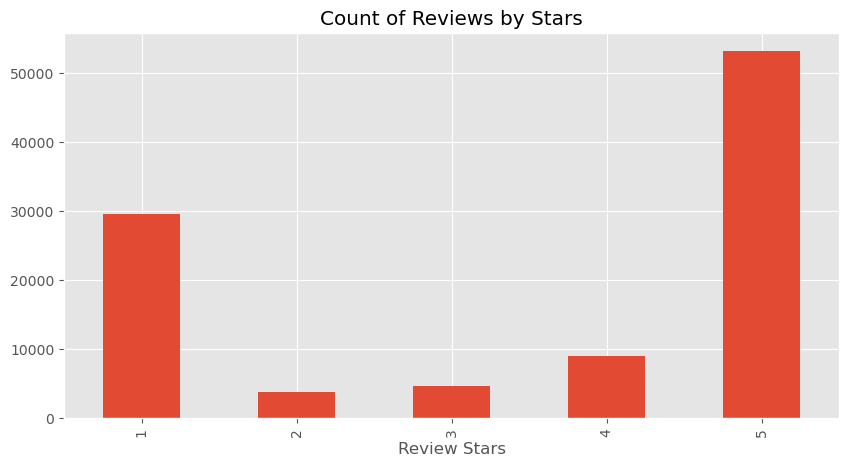

In [10]:
ax = df2['ReviewRating'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of Reviews by Stars', 
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20628\288991302.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_reviews = df.groupby(df['review_datetime_utc'].dt.to_period('M')).size()


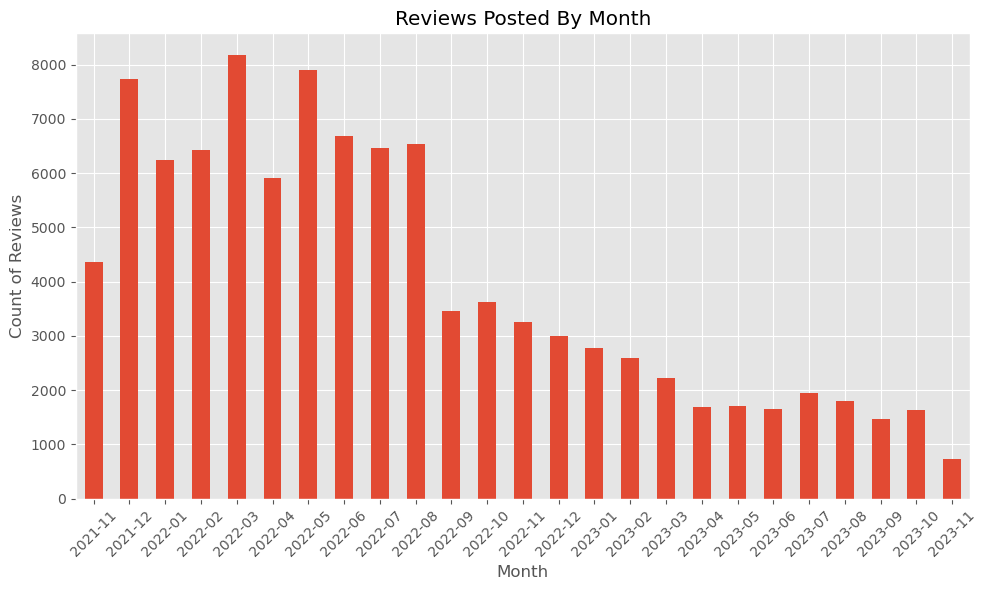

In [11]:
# Checking monthly reviews of dataset
monthly_reviews = df.groupby(df['review_datetime_utc'].dt.to_period('M')).size()

# Plot the graph
monthly_reviews.plot(kind='bar', figsize=(10, 6))
plt.title('Reviews Posted By Month')
plt.xlabel('Month')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### There is a surge of reviews in early 2022, and it seems to be consistent until August of that year. Did a campaign run on those months?

#### After sourcing the internet, I found this! https://www.foodpanda.com/newsroom/introducing-pau-pau-foodpanda-unveils-first-of-its-kind-brand-ambassador-to-champion-empowerment-and-sustainability/
#### It would seem it was FoodPanda's 10th year anniversary, and that also comes with the introduction of their brand ambassoador, Pau-Pau! However, I cannot determine the cause of these upsurge. 
#### My only assumption would be the organization has provided plentiful of special promotions or deals to celebrate their 10th year anniversary.

<hr>

#### I wonder what the highest liked reviews are? 

In [12]:
df2.nlargest(10, 'ReviewLikes')

,Id,ReviewText,ReviewRating,DatePosted,ReviewLikes
34412,34413,I love that the app is easy to use and the rat...,4,2022-04-09 09:55:04+00:00,9374
91924,91925,"Lately, I've been encountering a frustrating s...",1,2023-06-22 12:46:59+00:00,7293
41343,41344,Have been using this for over 5 years now. Nev...,1,2022-05-10 13:06:18+00:00,7006
33799,33800,The app is good. It is very convenient. But so...,2,2022-04-06 12:06:49+00:00,6863
36609,36610,It's a really useful app in terms of navigatio...,5,2022-04-20 14:24:48+00:00,6855
88514,88515,When items are removed from an order on the bu...,3,2023-04-23 09:52:45+00:00,4272
58627,58628,It's a really useful app in terms of navigatio...,5,2022-07-28 21:15:45+00:00,4032
91900,91901,"I use it often, but every time it allows hacke...",3,2023-06-22 06:25:55+00:00,3621
28280,28281,I am really disappointed with this app. I ofte...,1,2022-03-14 19:27:39+00:00,3412
24591,24592,I do like the app since there are often variou...,4,2022-02-28 02:25:46+00:00,3391


In [13]:
# Exploring the review with 7293 likes
df2.loc[df2['ReviewLikes'] == 7293]['ReviewText'].iloc[0]

"Lately, I've been encountering a frustrating scenario. It appears that the restaurants are consistently closed due to unexpected circumstances, leaving me unable to place an order when I need to. On top of that, the app itself is plagued by extensive lag, which makes the overall user experience quite unpleasant. To exacerbate matters, the timer on the delivery menu is unreliable, resulting in consistently late deliveries. It's frustrating to encounter such setbacks while trying to enjoy a meal."

In [14]:
# Exploring the review with 4272 likes
df2.loc[df2['ReviewLikes'] == 4272]['ReviewText'].iloc[0]

'When items are removed from an order on the business side, it does not give you a chance to replace the item with something else or an option to cancel the order. I have had only drinks or deserts delivered to me whilst the main meals were removed, it wastes both my time and money spent of delivery. The search function in the app is abysmal, the results have no correlation to the input and you have to sift through thousands of results. The after sales service is good, problems resolved quickly.'

#### I aim to analyze user feedback to pinpoint both areas of dissatisfaction and features that are highly valued within the appwhile also exploring additional insights. To do that, I plan to utilize natural language processing (NLP) methods to analyze these user feedback. This approach allows for a quick and intuitive understanding of the prevalent themes and sentiments expressed by users!

In [15]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

reviews = df2['ReviewText'].tolist()
review_ratings = df2['ReviewRating'].tolist()

# Removing stop words, punctuation and unnecessary words from previous runs
stop_words = set(stopwords.words('english'))
unnecessary_words = {'food', 'app', 'panda', 'foodpanda'}
reviews_filtered = []

for x in reviews:
    words = word_tokenize(x.lower()) # Tokenize individual words 
    filtered_words = [n for n in words if n not in stop_words and n.isalpha() and n not in unnecessary_words] # Check for stop words and alphabetic
    reviews_filtered.append(' '.join(filtered_words))

# Tokenize the filtered words, do calculation on word frequency for positive/negative reviews
positive_words = []
negative_words = []

for review, rating in zip(reviews_filtered, review_ratings):
    words = word_tokenize(review)
    if rating <= 2:  # Ratings 1-2 considered as negative
        negative_words.extend(words)
    elif rating >= 3:  # 3-5 considered as positive
        positive_words.extend(words)
        
# Calculate word frequency for positive and negative reviews
positive_freq_dist = FreqDist(positive_words)
negative_freq_dist = FreqDist(negative_words)

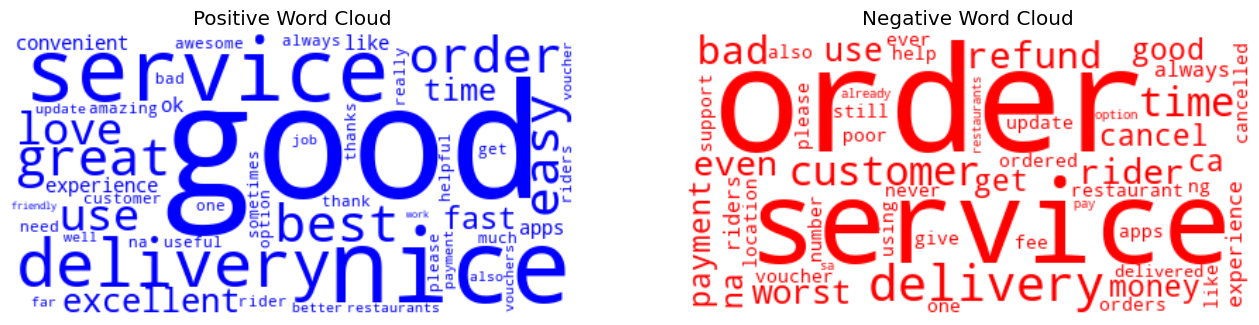

In [16]:
# Word clouds for positive and negative reviews
wc_positive = WordCloud(background_color='white', color_func=lambda *args, **kwargs: "blue", max_words=50).generate_from_frequencies(positive_freq_dist)
wc_negative = WordCloud(background_color='white', color_func=lambda *args, **kwargs: "red", max_words=50).generate_from_frequencies(negative_freq_dist)

# Plotting word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_positive, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wc_negative, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis('off')
plt.show()

#### The positive word cloud mention words like "service," "good," "order," "delivery," "fast," and "excellent," suggesting that efficient service, timely order fulfillment and delivery, as well as a pleasant overall experience, contribute to positive customer sentiments.

#### On the other hand, the negative word cloud prominently features words such as "bad," "refund," "cancel," "poor," "worst," and "delivery," indicating that issues related to poor service, delivery problems, order cancellations, and the need for refunds are major pain points and sources of negative sentiment. Words like "customer," "rider," and "money" also appear, suggesting that interactions with delivery personnel and financial concerns may contribute to negative experiences.

### Suggestions for FoodPanda:
1. Focus on consistently delivering excellent service to address the major pain point of "bad service" highlighted in the negative word cloud.

2. Streamline order and delivery processes, as words like "order," "delivery," and "convenient" appear in both word clouds, suggesting areas for improvement.

3. Improve customer support and issue resolution, as the negative cloud includes words like "refund," "cancel," and "money," indicating frustrations with payments and problems requiring refunds.

4. Foster positive interactions with riders/drivers, as the word "rider" appears in both clouds, suggesting the importance of delivery personnel in creating a great experience.

5. Continuously gather and analyze customer feedback to identify areas for improvement and emerging issues based on the valuable insights provided by the contrasting word clouds.

<hr>

### 🤗 Basics

#### I will import the necessary libraries and use the DistilBERT model (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english). I will discuss some of  it's limitations at the end.

In [42]:
# libraries
from transformers import pipeline
import torch

sent_pipeline = pipeline('sentiment-analysis', model='distilbert/distilbert-base-uncased-finetuned-sst-2-english')

In [43]:
# Test out pipeline
sent_pipeline('i hate this app..!')

[{'label': 'NEGATIVE', 'score': 0.9997357726097107}]

In [45]:
# Random sentiment review test
random = np.random.randint(0,50000)
example = df2['ReviewText'][random]
print(df2['ReviewText'][random])
print(sent_pipeline(example))

MY REVIEW KEEPS GETTING DELETED BUT PROBLEM ISN'T GETTING FIXED... IT IS SAYING NOT AVAILABLE IN MY AREA YET EVEN THOUGH HAVE ORDERED MULTIPLE TIMES BEFORE...
[{'label': 'NEGATIVE', 'score': 0.9977624416351318}]


##### I will now run the sentiment pipeline's prediction on the entire dataset. Afterwards, I'll create a new DataFrame (df3) to join back to the original df2

##### To achieve this, I'll iterate over each row in df2. For each row, I'll extract the 'ReviewText' and 'Id' values. Passing the 'ReviewText' through the sentiment pipeline and store the result in a dictionary res, where the 'Id' serves as the key and the prediction output as the value

In [46]:
# Run predictions on the entire dataset
from tqdm import tqdm

res = {}
for i, row in tqdm(df2.iterrows(), total=len(df2)):
    try:
        text = row['ReviewText']
        myid = row['Id']
        res[myid] = sent_pipeline(text)
    except ValueError:
        print(f'Broke for id {myid}')

100%|██████████| 100000/100000 [44:34<00:00, 37.39it/s] 


##### I'll convert the dictionary res into df3 using .T attribute to transpose it. This DataFrame will have sentiment predictions aligned with their corresponding 'Id'.

In [47]:
df3 = pd.DataFrame(res).T
df3.head()

,0
1,"{'label': 'POSITIVE', 'score': 0.9998520612716..."
2,"{'label': 'POSITIVE', 'score': 0.9984772801399..."
3,"{'label': 'POSITIVE', 'score': 0.9998552799224..."
4,"{'label': 'NEGATIVE', 'score': 0.999599277973175}"
5,"{'label': 'POSITIVE', 'score': 0.9983824491500..."


In [48]:
df2.head()

,Id,ReviewText,ReviewRating,DatePosted,ReviewLikes
0,1,Very good,5,2021-11-12 04:51:57+00:00,0
1,2,"i is good to buy from panda mart , i have got ...",4,2021-11-12 04:53:14+00:00,0
2,3,Nice,1,2021-11-12 04:56:48+00:00,0
3,4,"Everytime i need to ordered, i need to update ...",1,2021-11-12 04:59:18+00:00,0
4,5,Use Full App Thank You Soo Much ❤️,5,2021-11-12 05:13:52+00:00,0


In [49]:
df3 = df3.reset_index().rename(columns={'index': 'Id'})

##### Finally, we can join this df3 back to our original df2

In [50]:
df3['Label'] = df3[0].apply(lambda x: x['label'])
df3['Score'] = df3[0].apply(lambda x: x['score'])
df3 = df3.merge(df2, how= 'left')

df3.head()

,Id,0,Label,Score,ReviewText,ReviewRating,DatePosted,ReviewLikes
0,1,"{'label': 'POSITIVE', 'score': 0.9998520612716...",POSITIVE,0.999852,Very good,5,2021-11-12 04:51:57+00:00,0
1,2,"{'label': 'POSITIVE', 'score': 0.9984772801399...",POSITIVE,0.998477,"i is good to buy from panda mart , i have got ...",4,2021-11-12 04:53:14+00:00,0
2,3,"{'label': 'POSITIVE', 'score': 0.9998552799224...",POSITIVE,0.999855,Nice,1,2021-11-12 04:56:48+00:00,0
3,4,"{'label': 'NEGATIVE', 'score': 0.999599277973175}",NEGATIVE,0.999599,"Everytime i need to ordered, i need to update ...",1,2021-11-12 04:59:18+00:00,0
4,5,"{'label': 'POSITIVE', 'score': 0.9983824491500...",POSITIVE,0.998382,Use Full App Thank You Soo Much ❤️,5,2021-11-12 05:13:52+00:00,0


In [51]:
# Drop the original column 0
df3.drop(columns=[0], inplace=True)

<hr>

##### Adjusting df3 to better fit our analysis by transforming the 'ReviewRating' column into categorical labels based on their corresponding sentiment scores.

,Id,Label,Score,ReviewText,ReviewRating,DatePosted,ReviewLikes
0,1,POSITIVE,0.999852,Very good,POSITIVE,2021-11-12 04:51:57+00:00,0
1,2,POSITIVE,0.998477,"i is good to buy from panda mart , i have got ...",POSITIVE,2021-11-12 04:53:14+00:00,0
2,3,POSITIVE,0.999855,Nice,NEGATIVE,2021-11-12 04:56:48+00:00,0
3,4,NEGATIVE,0.999599,"Everytime i need to ordered, i need to update ...",NEGATIVE,2021-11-12 04:59:18+00:00,0
4,5,POSITIVE,0.998382,Use Full App Thank You Soo Much ❤️,POSITIVE,2021-11-12 05:13:52+00:00,0


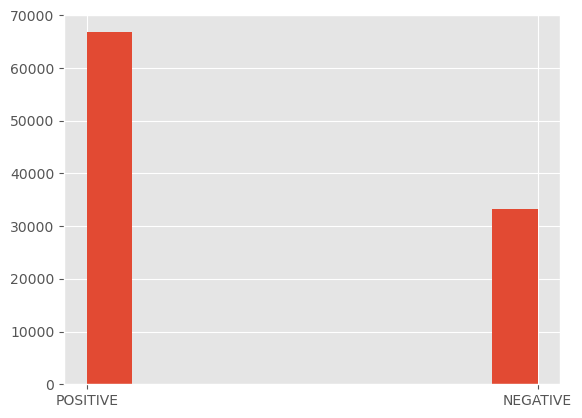

In [52]:
df3['ReviewRating'] = df3['ReviewRating'].apply(lambda x: 'NEGATIVE' if x in [1, 2] else 'POSITIVE')
df3['ReviewRating'].hist()
df3.head()

##### Filtering out rows with a 'ReviewRating' value not equal to 3, aka neutral ratings. Then, we map the remaining ratings to their sentiment labels: 'NEGATIVE' for ratings 1 and 2, and 'POSITIVE' for 4 and 5.

<hr>

#### Implementing confusion matrix to test accuracy

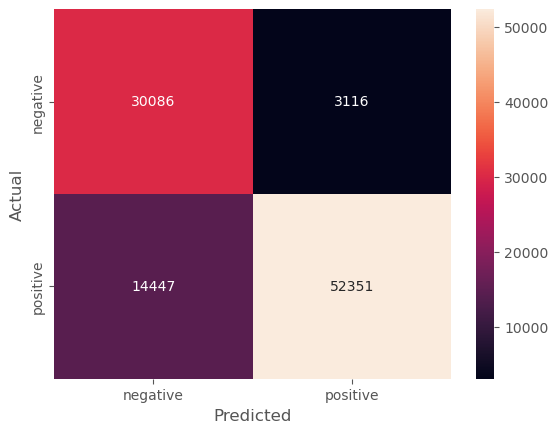

In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

# Extract the actual labels and predicted labels
actual_labels = df3['ReviewRating']
predicted_labels = df3['Label']

# Create the confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

def plot_cm(conf_matrix):
  classes = ['negative','positive']
  df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot = True, fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

plot_cm(conf_matrix)

##### It would seem that there are more false negative than false positive. Let's do some more digging to understand why that might be the case.

<hr>

####  Calculating Precision, Recall, F1-scores and Accuracy

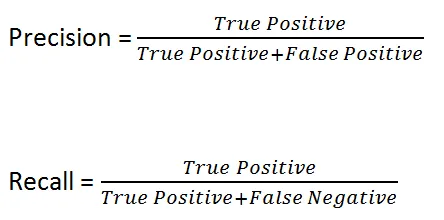
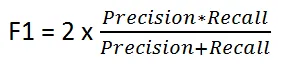

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics for the negative
neg_precision = tn / (tn + fp)
neg_recall = tn / (tn + fn)
neg_f1 = 2 * (neg_precision * neg_recall) / (neg_precision + neg_recall)

# Calculate metrics for the positive
pos_precision= tp / (tp + fn)
pos_recall = tp / (tp + fp)
pos_f1 = 2 * (pos_precision * pos_recall) / (pos_precision + pos_recall)

# Calculate overall accuracy
accuracy = (tn + tp) / (tn + fp + fn + tp)

print('Evaluation for negative class:')
print(f'Precision: {neg_precision:.3f}')
print(f'Recall: {neg_recall:.3f}')
print(f'F1-score: {neg_f1:.3f}')
print('\nEvaluation for positive class:')
print(f'Precision: {pos_precision:.3f}')
print(f'Recall: {pos_recall:.3f}')
print(f'F1-score: {pos_f1:.3f}')
print(f'\nOverall Accuracy: {accuracy:.3f}')

Evaluation for negative class:
Precision: 0.906
Recall: 0.676
F1-score: 0.774

Evaluation for positive class:
Precision: 0.784
Recall: 0.944
F1-score: 0.856

Overall Accuracy: 0.824


<hr>

## Feature Engineering

In [55]:
sent_pipeline('👍')

[{'label': 'NEGATIVE', 'score': 0.6970567107200623}]

#### It would seem that emojis are read as NEGATIVE sentiment by the sentiment pipeline with a 69% score. I can recreate the whole process by using the emoji library's 'demojize'.

In [56]:
import emoji

print(emoji.demojize('👍'))
sent_pipeline(emoji.demojize('❤️'))

:thumbs_up:


[{'label': 'POSITIVE', 'score': 0.9967260360717773}]

#### The model seems to predict better once the unicode emoji has been converted to emoji names!

In [57]:
# Create a new copy to test demojize on the model
df4 = df2.copy()

#### In this step, I will attempt to remove duplicated emojis that are excessively spammed in the ReviewText. This is important as the RuntimeError might occur as the converted texts will go beyond length 512. (https://huggingface.co/docs/transformers/main/en/model_memory_anatomy)

#### 'emoji_rx' seems to include all the common emojis, as gathered from this kaggle code (https://www.kaggle.com/code/infamouscoder/emoji-sentiment-features).

In [58]:
import re

emoji_rx = r"[#*0-9]\uFE0F?\u20E3|©\uFE0F?|[®\u203C\u2049\u2122\u2139\u2194-\u2199\u21A9\u21AA]\uFE0F?|[\u231A\u231B]|[\u2328\u23CF]\uFE0F?|[\u23E9-\u23EC]|[\u23ED-\u23EF]\uFE0F?|\u23F0|[\u23F1\u23F2]\uFE0F?|\u23F3|[\u23F8-\u23FA\u24C2\u25AA\u25AB\u25B6\u25C0\u25FB\u25FC]\uFE0F?|[\u25FD\u25FE]|[\u2600-\u2604\u260E\u2611]\uFE0F?|[\u2614\u2615]|\u2618\uFE0F?|\u261D[\uFE0F\U0001F3FB-\U0001F3FF]?|[\u2620\u2622\u2623\u2626\u262A\u262E\u262F\u2638-\u263A\u2640\u2642]\uFE0F?|[\u2648-\u2653]|[\u265F\u2660\u2663\u2665\u2666\u2668\u267B\u267E]\uFE0F?|\u267F|\u2692\uFE0F?|\u2693|[\u2694-\u2697\u2699\u269B\u269C\u26A0]\uFE0F?|\u26A1|\u26A7\uFE0F?|[\u26AA\u26AB]|[\u26B0\u26B1]\uFE0F?|[\u26BD\u26BE\u26C4\u26C5]|\u26C8\uFE0F?|\u26CE|[\u26CF\u26D1\u26D3]\uFE0F?|\u26D4|\u26E9\uFE0F?|\u26EA|[\u26F0\u26F1]\uFE0F?|[\u26F2\u26F3]|\u26F4\uFE0F?|\u26F5|[\u26F7\u26F8]\uFE0F?|\u26F9(?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\u26FA\u26FD]|\u2702\uFE0F?|\u2705|[\u2708\u2709]\uFE0F?|[\u270A\u270B][\U0001F3FB-\U0001F3FF]?|[\u270C\u270D][\uFE0F\U0001F3FB-\U0001F3FF]?|\u270F\uFE0F?|[\u2712\u2714\u2716\u271D\u2721]\uFE0F?|\u2728|[\u2733\u2734\u2744\u2747]\uFE0F?|[\u274C\u274E\u2753-\u2755\u2757]|\u2763\uFE0F?|\u2764(?:\u200D[\U0001F525\U0001FA79]|\uFE0F(?:\u200D[\U0001F525\U0001FA79])?)?|[\u2795-\u2797]|\u27A1\uFE0F?|[\u27B0\u27BF]|[\u2934\u2935\u2B05-\u2B07]\uFE0F?|[\u2B1B\u2B1C\u2B50\u2B55]|[\u3030\u303D\u3297\u3299]\uFE0F?|[\U0001F004\U0001F0CF]|[\U0001F170\U0001F171\U0001F17E\U0001F17F]\uFE0F?|[\U0001F18E\U0001F191-\U0001F19A]|\U0001F1E6[\U0001F1E8-\U0001F1EC\U0001F1EE\U0001F1F1\U0001F1F2\U0001F1F4\U0001F1F6-\U0001F1FA\U0001F1FC\U0001F1FD\U0001F1FF]|\U0001F1E7[\U0001F1E6\U0001F1E7\U0001F1E9-\U0001F1EF\U0001F1F1-\U0001F1F4\U0001F1F6-\U0001F1F9\U0001F1FB\U0001F1FC\U0001F1FE\U0001F1FF]|\U0001F1E8[\U0001F1E6\U0001F1E8\U0001F1E9\U0001F1EB-\U0001F1EE\U0001F1F0-\U0001F1F5\U0001F1F7\U0001F1FA-\U0001F1FF]|\U0001F1E9[\U0001F1EA\U0001F1EC\U0001F1EF\U0001F1F0\U0001F1F2\U0001F1F4\U0001F1FF]|\U0001F1EA[\U0001F1E6\U0001F1E8\U0001F1EA\U0001F1EC\U0001F1ED\U0001F1F7-\U0001F1FA]|\U0001F1EB[\U0001F1EE-\U0001F1F0\U0001F1F2\U0001F1F4\U0001F1F7]|\U0001F1EC[\U0001F1E6\U0001F1E7\U0001F1E9-\U0001F1EE\U0001F1F1-\U0001F1F3\U0001F1F5-\U0001F1FA\U0001F1FC\U0001F1FE]|\U0001F1ED[\U0001F1F0\U0001F1F2\U0001F1F3\U0001F1F7\U0001F1F9\U0001F1FA]|\U0001F1EE[\U0001F1E8-\U0001F1EA\U0001F1F1-\U0001F1F4\U0001F1F6-\U0001F1F9]|\U0001F1EF[\U0001F1EA\U0001F1F2\U0001F1F4\U0001F1F5]|\U0001F1F0[\U0001F1EA\U0001F1EC-\U0001F1EE\U0001F1F2\U0001F1F3\U0001F1F5\U0001F1F7\U0001F1FC\U0001F1FE\U0001F1FF]|\U0001F1F1[\U0001F1E6-\U0001F1E8\U0001F1EE\U0001F1F0\U0001F1F7-\U0001F1FB\U0001F1FE]|\U0001F1F2[\U0001F1E6\U0001F1E8-\U0001F1ED\U0001F1F0-\U0001F1FF]|\U0001F1F3[\U0001F1E6\U0001F1E8\U0001F1EA-\U0001F1EC\U0001F1EE\U0001F1F1\U0001F1F4\U0001F1F5\U0001F1F7\U0001F1FA\U0001F1FF]|\U0001F1F4\U0001F1F2|\U0001F1F5[\U0001F1E6\U0001F1EA-\U0001F1ED\U0001F1F0-\U0001F1F3\U0001F1F7-\U0001F1F9\U0001F1FC\U0001F1FE]|\U0001F1F6\U0001F1E6|\U0001F1F7[\U0001F1EA\U0001F1F4\U0001F1F8\U0001F1FA\U0001F1FC]|\U0001F1F8[\U0001F1E6-\U0001F1EA\U0001F1EC-\U0001F1F4\U0001F1F7-\U0001F1F9\U0001F1FB\U0001F1FD-\U0001F1FF]|\U0001F1F9[\U0001F1E6\U0001F1E8\U0001F1E9\U0001F1EB-\U0001F1ED\U0001F1EF-\U0001F1F4\U0001F1F7\U0001F1F9\U0001F1FB\U0001F1FC\U0001F1FF]|\U0001F1FA[\U0001F1E6\U0001F1EC\U0001F1F2\U0001F1F3\U0001F1F8\U0001F1FE\U0001F1FF]|\U0001F1FB[\U0001F1E6\U0001F1E8\U0001F1EA\U0001F1EC\U0001F1EE\U0001F1F3\U0001F1FA]|\U0001F1FC[\U0001F1EB\U0001F1F8]|\U0001F1FD\U0001F1F0|\U0001F1FE[\U0001F1EA\U0001F1F9]|\U0001F1FF[\U0001F1E6\U0001F1F2\U0001F1FC]|\U0001F201|\U0001F202\uFE0F?|[\U0001F21A\U0001F22F\U0001F232-\U0001F236]|\U0001F237\uFE0F?|[\U0001F238-\U0001F23A\U0001F250\U0001F251\U0001F300-\U0001F320]|[\U0001F321\U0001F324-\U0001F32C]\uFE0F?|[\U0001F32D-\U0001F335]|\U0001F336\uFE0F?|[\U0001F337-\U0001F37C]|\U0001F37D\uFE0F?|[\U0001F37E-\U0001F384]|\U0001F385[\U0001F3FB-\U0001F3FF]?|[\U0001F386-\U0001F393]|[\U0001F396\U0001F397\U0001F399-\U0001F39B\U0001F39E\U0001F39F]\uFE0F?|[\U0001F3A0-\U0001F3C1]|\U0001F3C2[\U0001F3FB-\U0001F3FF]?|[\U0001F3C3\U0001F3C4](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3C5\U0001F3C6]|\U0001F3C7[\U0001F3FB-\U0001F3FF]?|[\U0001F3C8\U0001F3C9]|\U0001F3CA(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3CB\U0001F3CC](?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F3CD\U0001F3CE]\uFE0F?|[\U0001F3CF-\U0001F3D3]|[\U0001F3D4-\U0001F3DF]\uFE0F?|[\U0001F3E0-\U0001F3F0]|\U0001F3F3(?:\u200D(?:\u26A7\uFE0F?|\U0001F308)|\uFE0F(?:\u200D(?:\u26A7\uFE0F?|\U0001F308))?)?|\U0001F3F4(?:\u200D\u2620\uFE0F?|\U000E0067\U000E0062(?:\U000E0065\U000E006E\U000E0067|\U000E0073\U000E0063\U000E0074|\U000E0077\U000E006C\U000E0073)\U000E007F)?|[\U0001F3F5\U0001F3F7]\uFE0F?|[\U0001F3F8-\U0001F407]|\U0001F408(?:\u200D\u2B1B)?|[\U0001F409-\U0001F414]|\U0001F415(?:\u200D\U0001F9BA)?|[\U0001F416-\U0001F43A]|\U0001F43B(?:\u200D\u2744\uFE0F?)?|[\U0001F43C-\U0001F43E]|\U0001F43F\uFE0F?|\U0001F440|\U0001F441(?:\u200D\U0001F5E8\uFE0F?|\uFE0F(?:\u200D\U0001F5E8\uFE0F?)?)?|[\U0001F442\U0001F443][\U0001F3FB-\U0001F3FF]?|[\U0001F444\U0001F445]|[\U0001F446-\U0001F450][\U0001F3FB-\U0001F3FF]?|[\U0001F451-\U0001F465]|[\U0001F466\U0001F467][\U0001F3FB-\U0001F3FF]?|\U0001F468(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED]|\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?|[\U0001F468\U0001F469]\u200D(?:\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?)|[\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FC-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?\U0001F468[\U0001F3FB-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F468[\U0001F3FB-\U0001F3FE]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|\U0001F469(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D)?[\U0001F468\U0001F469]|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED]|\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?|\U0001F469\u200D(?:\U0001F466(?:\u200D\U0001F466)?|\U0001F467(?:\u200D[\U0001F466\U0001F467])?)|[\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FC-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF]|\U0001F48B\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FF])|[\U0001F33E\U0001F373\U0001F37C\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D[\U0001F468\U0001F469][\U0001F3FB-\U0001F3FE]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|\U0001F46A|[\U0001F46B-\U0001F46D][\U0001F3FB-\U0001F3FF]?|\U0001F46E(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F46F(?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F470\U0001F471](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F472[\U0001F3FB-\U0001F3FF]?|\U0001F473(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F474-\U0001F476][\U0001F3FB-\U0001F3FF]?|\U0001F477(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F478[\U0001F3FB-\U0001F3FF]?|[\U0001F479-\U0001F47B]|\U0001F47C[\U0001F3FB-\U0001F3FF]?|[\U0001F47D-\U0001F480]|[\U0001F481\U0001F482](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F483[\U0001F3FB-\U0001F3FF]?|\U0001F484|\U0001F485[\U0001F3FB-\U0001F3FF]?|[\U0001F486\U0001F487](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F488-\U0001F48E]|\U0001F48F[\U0001F3FB-\U0001F3FF]?|\U0001F490|\U0001F491[\U0001F3FB-\U0001F3FF]?|[\U0001F492-\U0001F4A9]|\U0001F4AA[\U0001F3FB-\U0001F3FF]?|[\U0001F4AB-\U0001F4FC]|\U0001F4FD\uFE0F?|[\U0001F4FF-\U0001F53D]|[\U0001F549\U0001F54A]\uFE0F?|[\U0001F54B-\U0001F54E\U0001F550-\U0001F567]|[\U0001F56F\U0001F570\U0001F573]\uFE0F?|\U0001F574[\uFE0F\U0001F3FB-\U0001F3FF]?|\U0001F575(?:\u200D[\u2640\u2642]\uFE0F?|[\uFE0F\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F576-\U0001F579]\uFE0F?|\U0001F57A[\U0001F3FB-\U0001F3FF]?|[\U0001F587\U0001F58A-\U0001F58D]\uFE0F?|\U0001F590[\uFE0F\U0001F3FB-\U0001F3FF]?|[\U0001F595\U0001F596][\U0001F3FB-\U0001F3FF]?|\U0001F5A4|[\U0001F5A5\U0001F5A8\U0001F5B1\U0001F5B2\U0001F5BC\U0001F5C2-\U0001F5C4\U0001F5D1-\U0001F5D3\U0001F5DC-\U0001F5DE\U0001F5E1\U0001F5E3\U0001F5E8\U0001F5EF\U0001F5F3\U0001F5FA]\uFE0F?|[\U0001F5FB-\U0001F62D]|\U0001F62E(?:\u200D\U0001F4A8)?|[\U0001F62F-\U0001F634]|\U0001F635(?:\u200D\U0001F4AB)?|\U0001F636(?:\u200D\U0001F32B\uFE0F?)?|[\U0001F637-\U0001F644]|[\U0001F645-\U0001F647](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F648-\U0001F64A]|\U0001F64B(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F64C[\U0001F3FB-\U0001F3FF]?|[\U0001F64D\U0001F64E](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F64F[\U0001F3FB-\U0001F3FF]?|[\U0001F680-\U0001F6A2]|\U0001F6A3(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F6A4-\U0001F6B3]|[\U0001F6B4-\U0001F6B6](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F6B7-\U0001F6BF]|\U0001F6C0[\U0001F3FB-\U0001F3FF]?|[\U0001F6C1-\U0001F6C5]|\U0001F6CB\uFE0F?|\U0001F6CC[\U0001F3FB-\U0001F3FF]?|[\U0001F6CD-\U0001F6CF]\uFE0F?|[\U0001F6D0-\U0001F6D2\U0001F6D5-\U0001F6D7\U0001F6DD-\U0001F6DF]|[\U0001F6E0-\U0001F6E5\U0001F6E9]\uFE0F?|[\U0001F6EB\U0001F6EC]|[\U0001F6F0\U0001F6F3]\uFE0F?|[\U0001F6F4-\U0001F6FC\U0001F7E0-\U0001F7EB\U0001F7F0]|\U0001F90C[\U0001F3FB-\U0001F3FF]?|[\U0001F90D\U0001F90E]|\U0001F90F[\U0001F3FB-\U0001F3FF]?|[\U0001F910-\U0001F917]|[\U0001F918-\U0001F91F][\U0001F3FB-\U0001F3FF]?|[\U0001F920-\U0001F925]|\U0001F926(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F927-\U0001F92F]|[\U0001F930-\U0001F934][\U0001F3FB-\U0001F3FF]?|\U0001F935(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F936[\U0001F3FB-\U0001F3FF]?|[\U0001F937-\U0001F939](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F93A|\U0001F93C(?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F93D\U0001F93E](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F93F-\U0001F945\U0001F947-\U0001F976]|\U0001F977[\U0001F3FB-\U0001F3FF]?|[\U0001F978-\U0001F9B4]|[\U0001F9B5\U0001F9B6][\U0001F3FB-\U0001F3FF]?|\U0001F9B7|[\U0001F9B8\U0001F9B9](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9BA|\U0001F9BB[\U0001F3FB-\U0001F3FF]?|[\U0001F9BC-\U0001F9CC]|[\U0001F9CD-\U0001F9CF](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9D0|\U0001F9D1(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD])|\U0001F3FB(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FC-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FC(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB\U0001F3FD-\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FD(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FE(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB-\U0001F3FD\U0001F3FF]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?|\U0001F3FF(?:\u200D(?:[\u2695\u2696\u2708]\uFE0F?|\u2764\uFE0F?\u200D(?:\U0001F48B\u200D|)\U0001F9D1[\U0001F3FB-\U0001F3FE]|[\U0001F33E\U0001F373\U0001F37C\U0001F384\U0001F393\U0001F3A4\U0001F3A8\U0001F3EB\U0001F3ED\U0001F4BB\U0001F4BC\U0001F527\U0001F52C\U0001F680\U0001F692]|\U0001F91D\u200D\U0001F9D1[\U0001F3FB-\U0001F3FF]|[\U0001F9AF-\U0001F9B3\U0001F9BC\U0001F9BD]))?)?|[\U0001F9D2\U0001F9D3][\U0001F3FB-\U0001F3FF]?|\U0001F9D4(?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|\U0001F9D5[\U0001F3FB-\U0001F3FF]?|[\U0001F9D6-\U0001F9DD](?:\u200D[\u2640\u2642]\uFE0F?|[\U0001F3FB-\U0001F3FF](?:\u200D[\u2640\u2642]\uFE0F?)?)?|[\U0001F9DE\U0001F9DF](?:\u200D[\u2640\u2642]\uFE0F?)?|[\U0001F9E0-\U0001F9FF\U0001FA70-\U0001FA74\U0001FA78-\U0001FA7C\U0001FA80-\U0001FA86\U0001FA90-\U0001FAAC\U0001FAB0-\U0001FABA\U0001FAC0-\U0001FAC2]|[\U0001FAC3-\U0001FAC5][\U0001F3FB-\U0001F3FF]?|[\U0001FAD0-\U0001FAD9\U0001FAE0-\U0001FAE7]|\U0001FAF0[\U0001F3FB-\U0001F3FF]?|\U0001FAF1(?:\U0001F3FB(?:\u200D\U0001FAF2[\U0001F3FC-\U0001F3FF])?|\U0001F3FC(?:\u200D\U0001FAF2[\U0001F3FB\U0001F3FD-\U0001F3FF])?|\U0001F3FD(?:\u200D\U0001FAF2[\U0001F3FB\U0001F3FC\U0001F3FE\U0001F3FF])?|\U0001F3FE(?:\u200D\U0001FAF2[\U0001F3FB-\U0001F3FD\U0001F3FF])?|\U0001F3FF(?:\u200D\U0001FAF2[\U0001F3FB-\U0001F3FE])?)?|[\U0001FAF2-\U0001FAF6][\U0001F3FB-\U0001F3FF]?"

def remove_duplicate_emojis(text):
    emoji_pattern = re.compile(emoji_rx)
    return emoji_pattern.sub(lambda m: ''.join(dict.fromkeys(m.group(0))), text)

# Apply demojize function to the ReviewText column after removing duplicate consecutive emojis
df4['ReviewText'] = df4['ReviewText'].apply(lambda x: emoji.demojize(remove_duplicate_emojis(x)))

In [59]:
df4.head()

,Id,ReviewText,ReviewRating,DatePosted,ReviewLikes
0,1,Very good,5,2021-11-12 04:51:57+00:00,0
1,2,"i is good to buy from panda mart , i have got ...",4,2021-11-12 04:53:14+00:00,0
2,3,Nice,1,2021-11-12 04:56:48+00:00,0
3,4,"Everytime i need to ordered, i need to update ...",1,2021-11-12 04:59:18+00:00,0
4,5,Use Full App Thank You Soo Much :red_heart:,5,2021-11-12 05:13:52+00:00,0


In [61]:
# Run predictions again

res2 = {}
for i, row in tqdm(df4.iterrows(), total=len(df4)):
    try:
        text = row['ReviewText']
        myid = row['Id']
        res2[myid] = sent_pipeline(text)
    except ValueError:
        print(f'Broke for id {myid} (ValueError)')
    except RuntimeError: # Catered in RunTimeError as there are some texts with loads of emojis in it
        print(f'Broke for id {myid} (RuntimeError)')

  6%|▌         | 6139/100000 [02:55<50:39, 30.88it/s]  

Broke for id 6134 (RuntimeError)


 25%|██▌       | 25202/100000 [12:07<33:17, 37.45it/s]  

Broke for id 25195 (RuntimeError)


 34%|███▍      | 34153/100000 [16:28<26:35, 41.28it/s]  

Broke for id 34150 (RuntimeError)


 77%|███████▋  | 77460/100000 [37:23<13:02, 28.80it/s]  

Broke for id 77455 (RuntimeError)


 86%|████████▌ | 85999/100000 [41:28<06:14, 37.36it/s]

Broke for id 85994 (RuntimeError)


 87%|████████▋ | 86727/100000 [41:50<05:39, 39.07it/s]

Broke for id 86722 (RuntimeError)


 91%|█████████ | 90752/100000 [44:15<04:45, 32.41it/s]

Broke for id 90747 (RuntimeError)


 93%|█████████▎| 92792/100000 [45:32<03:01, 39.71it/s]

Broke for id 92784 (RuntimeError)


 95%|█████████▌| 95457/100000 [47:15<03:24, 22.16it/s]

Broke for id 95454 (RuntimeError)


 97%|█████████▋| 97469/100000 [48:25<01:26, 29.38it/s]

Broke for id 97466 (RuntimeError)


100%|██████████| 100000/100000 [49:50<00:00, 33.44it/s]


In [62]:
df4 = pd.DataFrame(res2).T
df4 = df4.reset_index().rename(columns={'index': 'Id'})

In [65]:
# Checking the RuntimeError texts from previous dataframe
print(df3.loc[df3['Id'] == 92784]['ReviewText'].iloc[0])
print(df3.loc[df3['Id'] == 95454]['ReviewText'].iloc[0])
print(df3.loc[df3['Id'] == 97466]['ReviewText'].iloc[0])

I am very disappointed this app because cash method is not working please solve this problem 😭😭😭😭😭😭😭😭😭mara pas na debit card ha mana apka Assistant sa bat ki thi va kha rha ha mara account sa cash method disabled ha please unable karda mara pas koi online payment available nhi ha iam very disappointed this app🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏😖🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏🙏
Ano bayan food panda grabe naman kayo mag presyo!!!🤬🤬🤬 Ano ba gamit ng small order fee nyo?!?!?!?!?!?!?!?!?!?!?🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬 Babayarin ko kasi unte lang inorder ko?!?!?🤬 Napaka scam nuo naman!!!!!!!!!!🤬. DO NOT DOWNLOAD THIS APP THIS APP IS A SCAM!!!!!!!!!!!!!!!!!🤬 DO NOT WASTE YOUR MONEY HERE!!!🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬
waste of time,every time I order it for food delay sent. Our partner is already preparing your order. We can't cancel it now as that would mean wastage for our partner. We're doing better to improve our delivery times so we can get your order to you as soon as 

#### It appears that the function didn't work for 10 different ReviewTexts, maybe the emoji_rx variable doesn't include these emoji unicodes? Let's move on from here.

In [66]:
df4.head()

,Id,0
0,1,"{'label': 'POSITIVE', 'score': 0.9998520612716..."
1,2,"{'label': 'POSITIVE', 'score': 0.9984772801399..."
2,3,"{'label': 'POSITIVE', 'score': 0.9998552799224..."
3,4,"{'label': 'NEGATIVE', 'score': 0.999599277973175}"
4,5,"{'label': 'POSITIVE', 'score': 0.9974420070648..."


#### I will use the same exact method to join both tables together

In [67]:
df4['Label'] = df4[0].apply(lambda x: x['label'])
df4['Score'] = df4[0].apply(lambda x: x['score'])
df4 = df4.merge(df2, how= 'left')

df4.head()

,Id,0,Label,Score,ReviewText,ReviewRating,DatePosted,ReviewLikes
0,1,"{'label': 'POSITIVE', 'score': 0.9998520612716...",POSITIVE,0.999852,Very good,5,2021-11-12 04:51:57+00:00,0
1,2,"{'label': 'POSITIVE', 'score': 0.9984772801399...",POSITIVE,0.998477,"i is good to buy from panda mart , i have got ...",4,2021-11-12 04:53:14+00:00,0
2,3,"{'label': 'POSITIVE', 'score': 0.9998552799224...",POSITIVE,0.999855,Nice,1,2021-11-12 04:56:48+00:00,0
3,4,"{'label': 'NEGATIVE', 'score': 0.999599277973175}",NEGATIVE,0.999599,"Everytime i need to ordered, i need to update ...",1,2021-11-12 04:59:18+00:00,0
4,5,"{'label': 'POSITIVE', 'score': 0.9974420070648...",POSITIVE,0.997442,Use Full App Thank You Soo Much ❤️,5,2021-11-12 05:13:52+00:00,0


In [68]:
df4.drop(columns=[0], inplace=True)

In [69]:
df4['ReviewRating'] = df4['ReviewRating'].apply(lambda x: 'NEGATIVE' if x in [1, 2] else 'POSITIVE')

#### Creating confusion matrix for demojized sentiments

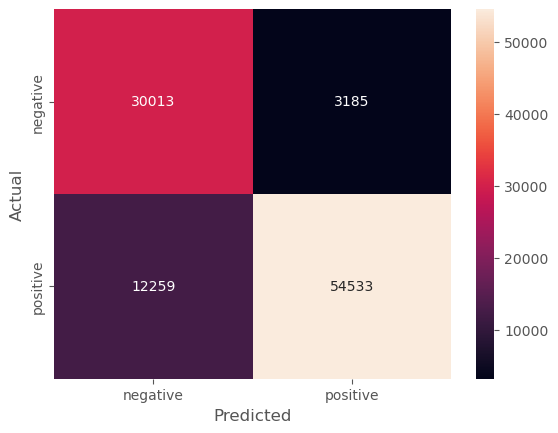

In [70]:
actual_labels2 = df4['ReviewRating']
predicted_labels2 = df4['Label']

# Create the confusion matrix
conf_matrix2 = confusion_matrix(actual_labels2, predicted_labels2)

def plot_cm(conf_matrix2):
  classes = ['negative','positive']
  df_cm = pd.DataFrame(conf_matrix2, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot = True, fmt='g')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

plot_cm(conf_matrix2)

#### Calculating precision, recall, F1-scores and accuracy, after demojizing

In [77]:
tn_2, fp_2, fn_2, tp_2 = conf_matrix2.ravel()

# Calculate metrics for the negative
neg_precision_2 = tn_2 / (tn_2 + fp_2)
neg_recall_2 = tn_2 / (tn_2 + fn_2)
neg_f1_2 = 2 * (neg_precision_2 * neg_recall_2) / (neg_precision_2 + neg_recall_2)

# Calculate metrics for the positive
pos_precision_2 = tp_2 / (tp_2 + fn_2)
pos_recall_2 = tp_2 / (tp_2 + fp_2)
pos_f1_2 = 2 * (pos_precision_2 * pos_recall_2) / (pos_precision_2 + pos_recall_2)

# Calculate overall accuracy
accuracy_2 = (tn_2 + tp_2) / (tn_2 + fp_2 + fn_2 + tp_2)

In [91]:
# Creating a table to visualize both calculations

from tabulate import tabulate

def format_number(num):
    if isinstance(num, float):
        return "{:.3f}".format(num)
    else:
        return num

before_metrics = [
   ["Negative", format_number(neg_precision), format_number(neg_recall), format_number(neg_f1)],
   ["Positive", format_number(pos_precision), format_number(pos_recall), format_number(pos_f1)],
   ["Overall Accuracy", format_number(accuracy), "-", "-"]
]

after_metrics = [
   ["Negative", format_number(neg_precision_2), format_number(neg_recall_2), format_number(neg_f1_2)],
   ["Positive", format_number(pos_precision_2), format_number(pos_recall_2), format_number(pos_f1_2)],
   ["Overall Accuracy", format_number(accuracy_2), "-", "-"]
]

print("BEFORE")
print(tabulate(before_metrics, headers=["Class", "Precision", "Recall", "F1-score"]))

print("\nAFTER (DEMOJIZE)")
print(tabulate(after_metrics, headers=["Class", "Precision", "Recall", "F1-score"]))


BEFORE
Class               Precision  Recall    F1-score
----------------  -----------  --------  ----------
Negative                0.906  0.676     0.774
Positive                0.784  0.944     0.856
Overall Accuracy        0.824  -         -

AFTER (DEMOJIZE)
Class               Precision  Recall    F1-score
----------------  -----------  --------  ----------
Negative                0.904  0.710     0.795
Positive                0.816  0.945     0.876
Overall Accuracy        0.846  -         -


#### Based on the results shown in the tables, here are my conclusions:

1. Overall Accuracy Improvement (0.824 to 0.846): Indicates that handling emojis properly helped the model make better predictions.

2. Precision Improvements: 
  - For the negative class, the precision slightly improved from 0.906 to 0.904 after demojizing, suggesting a minor reduction in false positives. 
  - For the positive class, the precision saw a more significant improvement, increasing from 0.784 to 0.816 after demojizing, indicating a better ability to correctly identify positive sentiments.

3. Recall Improvements: 
  - The recall for the negative class improved notably, from 0.676 to 0.710 after demojizing, meaning the model became better at detecting negative sentiments. 
  - The recall for the positive class also saw a minor improvement, from 0.944 to 0.945 after demojizing, indicating a slightly better ability to capture positive sentiments.


4. F1-score Improvements: 
Improved for both classes
- Negative class: Increased from 0.774 to 0.795
- Positive class: Increased from 0.856 to 0.876

#### These improvements in F1-scores suggest that the overall performance of the sentiment analysis model improved for both positive and negative sentiment detection after handling emojis correctly.

#### In summary, the feature engineering step of demojizing the text in reviews led to improved overall accuracy, better precision for positive sentiments, and better recall for negative sentiments. The F1-scores for both classes also improved, indicating a more balanced and effective sentiment analysis model after addressing the inconsistencies caused by emojis.

<hr>

#### Future Implementations:
1. Model Fine-tuning: While the pre-trained DistilBERT model performed reasonably well, fine-tuning it on a domain-specific dataset with the context of food delivery reviews, could further improve its accuracy.
2. Multilingual Support: Expanding the sentiment analysis capabilities to support multiple languages would be beneficial for FoodPanda, as the Google reviews include users from these countries (Bangladesh, Cambodia, Hong Kong, Laos, Malaysia, Myanmar, Pakistan, Philippines, Singapore, Taiwan Thailand).
3. Aspect-Based Sentiment Analysis: Instead of classifying the sentiment of the entire review, implementing aspect-based sentiment analysis could provide more granular insights by identifying the sentiment towards specific aspects of the service, such as delivery time, or customer support.

<hr>

#### Limitations:
##### Despite the limitations of my RTX 5700XT graphics card, I attempted to optimize the HuggingFace model for sentiment analysis. However, the process was time-consuming and  intensive on my machine due to the constraints of my hardware. While I couldn't fully leverage the CUDA capabilities for optimal performance, I persisted with the available resources to complete the analysis.

##### A major thank you to Rob Mulla (https://www.youtube.com/@robmulla) for the insightful NLTK and 🤗 Transformers tutorial as I wouldn't have done it without his help!